In [1]:
%matplotlib
import numpy as np
import matplotlib as mpl
import os
import pandas as pd
import glob
import palettable.scientific.diverging as pcd
import matplotlib.pylab as pylab
from matplotlib.ticker import FormatStrFormatter
import matplotlib.colors as mcolors

Using matplotlib backend: Qt5Agg


In [2]:
path = 'C://Research//2020_xiaoyang//MoltenSalt//manuscript_prep//additives//FXI_XANES//'
os.chdir(path)

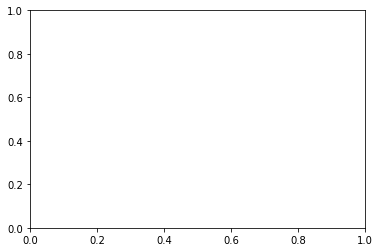

In [3]:
f1 = '79761_Ni_NiO_NiCl2_20220815.nor'
f2 = 'NiClusedFXI_anhydrousNiCl2_normE_20221021.nor'
fig, ax1 = pylab.subplots(1,1)


In [4]:
data_f1 = pd.read_csv(f1,skiprows=11,sep='\t')
data_f2 = pd.read_csv(f2,skiprows=8,sep='\t')
number = len(data_f1.columns)+len(data_f2.columns)
palette = pcd.get_map('Roma_16',reverse=False)
cmap = palette.mpl_colormap
colors = [cmap(i) for i in np.linspace(0,1,number)]

In [5]:
data_f1.columns


Index(['energy', '79621_Nistandard_spec.txt',
       '79761_NiCl2_5050_1h_spec_roi1.txt',
       '79761_NiCl2_5050_1h_spec_roi0.txt', 'NiO_02102020_standard_spec.txt',
       '91491_NiCl2standard_spec_spec.txt'],
      dtype='object')

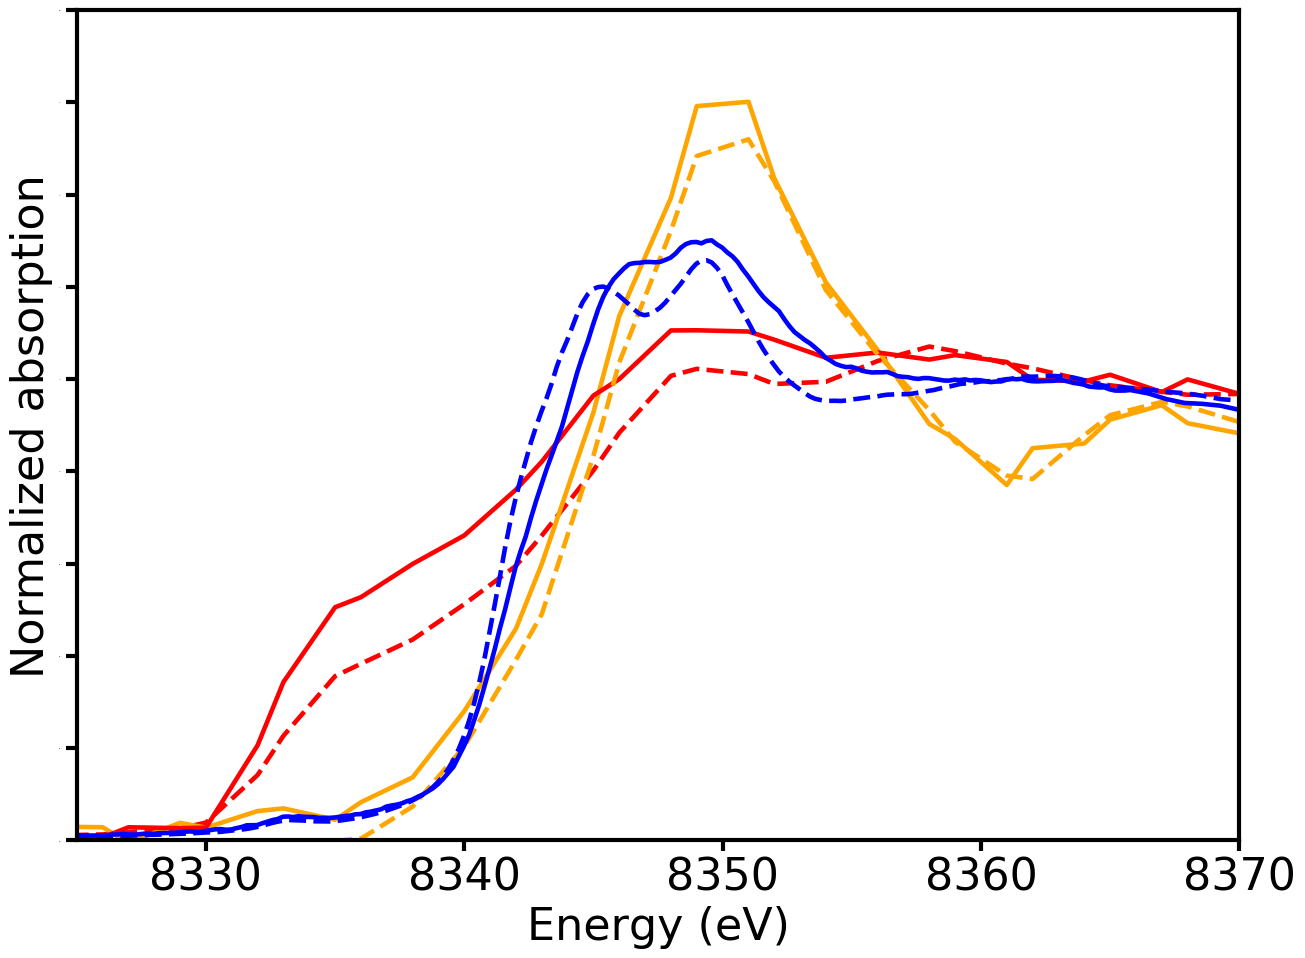

In [9]:
fig, ax1 = pylab.subplots(1,1)
x_f1 = np.asarray(data_f1['energy'])
y_f1_Ni = np.asarray(data_f1['79621_Nistandard_spec.txt'])
ax1.plot(x_f1,y_f1_Ni,linewidth=3.3,color='r',linestyle='--',label='Ni')

y_f1_roi1 = np.asarray(data_f1['79761_NiCl2_5050_1h_spec_roi1.txt'])
ax1.plot(x_f1,y_f1_roi1,linewidth=3.3,color='orange',label='roi1')

y_f1_roi0 = np.asarray(data_f1['79761_NiCl2_5050_1h_spec_roi0.txt'])
ax1.plot(x_f1,y_f1_roi0,linewidth=3.3,color='r',label='roi0')

y_f1_NiO = np.asarray(data_f1['NiO_02102020_standard_spec.txt'])
ax1.plot(x_f1,y_f1_NiO,linewidth=3.3,color='orange',linestyle='--',label='NiO')

#y_f1_NiCl2_hydrous = np.asarray(data_f1['91491_NiCl2standard_spec_spec.txt'])
#ax1.plot(x_f1,y_f1_NiCl2_hydrous,linewidth=3,color='k',linestyle='--',label='NiCl_hydrous')

x_f2 = np.asarray(data_f2['energy'])
y_f2_NiCl2_usedFXI = np.asarray(data_f2['merge_A_NiCl2_BN_usedFXI_10scans'])
ax1.plot(x_f2,y_f2_NiCl2_usedFXI,linewidth=3.3,color='b',label='NiCl2_used')

y_f2_anhydrous_NiCl2 = np.asarray(data_f2['merge_B_NiCl2_BN_INL_10scans'])
ax1.plot(x_f2,y_f2_anhydrous_NiCl2,linewidth=3.3,color='b',linestyle='--',label='anhydrou_NiCl2')

ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('Normalized absorption')
ax1.set_xlim([8325, 8370])
ax1.set_ylim([0, 1.8])
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax1.legend()
params = {'legend.fontsize':10,
          'figure.figsize':(15,11),
          'axes.labelsize':32,
          'axes.titlesize':28,
          'xtick.labelsize':32,
          'ytick.labelsize':0,
          'axes.linewidth': 3,
          'ytick.major.width': 3,
          'xtick.major.width': 3,
          'ytick.major.size': 8,
          'xtick.major.size': 8,
          'figure.dpi': 100}
pylab.rcParams.update(params)

In [10]:
fig.savefig('test.tif',dpi=100)